# 3 記述統計学と単回帰分析

- **[3.1 記述統計学と単回帰分析](#3.1-記述統計学と単回帰分析)** 
    - [3.1.1 記述統計学](#3.1.1-記述統計学)
    - [3.1.2 単回帰分析](#3.1.2-単回帰分析)
<br><br>
- **[3.2 総合問題](#3.2-総合問題)**
    - [3.2.1 統計の基礎と可視化](#3.2.1-統計の基礎と可視化)
    - [3.2.2 ローレンツ曲線とジニ係数](#3.2.2-ローレンツ曲線とジニ係数)

***

## 3.1 記述統計学と単回帰分析

ゴール：csvファイルのデータを読み込み、基礎的な統計量の算出と可視化、単回帰分析ができる

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 3.1.1 記述統計学
キーワード：記述統計学、量的データ、質的データ、ヒストグラム、四分位範囲、要約統計量、平均、分散、標準偏差、変動係数、散布図、相関係数

これまではPythonといくつのモジュールについて、基本的な使い方を説明してきました。本章からはそれらを活用して、実際のデータと対話してみましょう。次は、今回使うデータ（Zipファイル）をウェブ上から直接ダウンロードし、展開するためのモジュールになります。

In [2]:
# webからデータを取得したり、zipファイルを扱うためのモジュール
import requests, zipfile
from io import StringIO
import io

コマンドライン等に慣れていな人のため、次のコマンドは現在どこのディレクトリ（フォルダ）にいるか出力するための命令です。なお、注意点として、同じセル内に、コマンドラインとpythonのコードを一緒にして実行はできません。それぞれ別のセルに分けてコーディングして、実行しましょう。

In [3]:
pwd

'/Users/isobehikaru/gci'

この章のためにフォルダを作成しましょう。以下の「mkdir name」はnameというフォルダを作成します。

In [4]:
mkdir chap2

次の「cd adress」は該当のフォルダ（ディレクトリ）に移動するコマンドです。

In [5]:
cd ./chap2

/Users/isobehikaru/gci/chap2


次に、該当のデータをネットを経由してダウンロードし、展開しましょう。以下がその処理となります。以下の2行目はデータがあるurlの指定をして、zipファイルを取得し、展開しています。データがちゃんとダウンロードされ、展開しているかチェックしましょう。次のコマンド「ls」を実行すると、今いるフォルダにあるファイル等を表示します。

今のフォルダにあるデータ等を全て表示します。

In [6]:
# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


この講座で使うデータは、「student-mat.csv」と「student-por.csv」になります。はじめに、「student-mat.csv」がどんなデータなのか観察していきます。（後の練習問題で「student-por.csv」と合わせたデータを使うことにします。）

次はpd.read_csvを使い、対象のデータファイル名をpandasのデータフレームとして扱います。

In [8]:
student_data_math = pd.read_csv("student-mat.csv")

データを読み込んだ後は、このデータにどんなカラムやデータが入っているかサンプルを見てみましょう。その場合、head()を使います。デフォルトでは5行表示されますが、行数を指定したい場合は、head(10)などとします。

In [9]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


データが入っているのはわかりますが、このままではデータが大変扱いにくいです。よくデータを見てみると、区切り文字は「;」となっています。実は、このread_csvはsepのパラメータ設定が可能で、区切り文字を指定できます。この区切り文字は、csvファイルだと「,」であることがほとんどで、デフォルトはこれで設定されていますが、今回は「;」ですので、これを区切り文字として指定して、データを再度読み込みましょう。

In [10]:
# データの読み込み
# 区切りが;ついているので注意
student_data_math = pd.read_csv("student-mat.csv", sep=";")

In [13]:
# どんなデータがあるかざっと見る
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


これでだいぶ見やすくなりました。なお、教科書的には、いきなり「;」で設定してやることが多いのですが、まだ何も知らない見たこともないデータに対して、1回の処理でそれがわかるというのは難しいです。データ分析の実務ではこういう試行錯誤があることも度々ありますので、あえてそのまま実施してみました。

なお、この「read_csv」については、パラメータがいくつかあり、データ名（アドレス含む）、区切り文字、ヘッダーがあるかないかを指定します。詳しくは、?pd.read_csvを実行して、どんなパラメータ等が設定できるのか調べてみましょう。

In [14]:
?pd.read_csv

先ほど読み込んだデータを見てみますと、schoolやageなど学生の属性情報が入っているというのはわかります。ただし、いくつデータがあるのか、どんなデータの種類があるのかまだわかりませんので、次のinfoを使うと、すべての変数について、nullでないデータの個数や変数の型がわかります。

In [14]:
# すべてのカラムの情報等チェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

はじめに「RangeIndex: 395 entries, 0 to 394」とあり、395個データがあります。non-nullはnullでないデータを意味し、全ての変数について「395 non-null」となっているので、今回はnullのデータがないようです。さらにこのデータを理解していくために、このカラムが一体何のデータなのか把握していきましょう。

実際のビジネスの現場では、このデータに詳しい人から情報をもらったり、またデータの仕様書を読み込んでいく必要があります。そういった情報が得られたという前提の下、以下に、このデータカラム名の説明等を記載します。先ほどデータと一緒にダウンロードされたstudent.txtファイルに、変数に関する詳しい情報が書いてあります。シェルやコマンドライン等に慣れている人は、ここで**less ファイル名**や**cat ファイル名**でその中身を見ることができます。

#### データの属性説明

1 school - 学校(binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)<br>
2 sex - 性 (binary: "F" - female or "M" - male)<br>
3 age - 年齢 (numeric: from 15 to 22)<br>
4 address - 住所のタイプ (binary: "U" - urban or "R" - rural)<br>
5 famsize - 家族の人数 (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)<br>
6 Pstatus - 両親と同居しているかどうか (binary: "T" - living together or "A" - apart)<br>
7 Medu - 母親の学歴 (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
8 Fedu - 父親の学歴 (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
9 Mjob - 母親の仕事 (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
10 Fjob - 父親の仕事 (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
11 reason - 学校を選んだ理由 (nominal: close to "home", school "reputation", "course" preference or "other")<br>
12 guardian - 生徒の保護者 (nominal: "mother", "father" or "other")<br>
13 traveltime - 通学時間 (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - 週の勉強時間(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - 過去のnumber of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - 追加の教育サポート (binary: yes or no)<br>
17 famsup - 家族の教育サポート (binary: yes or no)<br>
18 paid - 追加の有料クラス(Math or Portuguese) (binary: yes or no)<br>
19 activities - 学校外の活動 (binary: yes or no)<br>
20 nursery - 保育園に通ったことがあるかどうか (binary: yes or no)<br>
21 higher - 高い教育を受けたいかどうか(binary: yes or no)<br>
22 internet - 家でインターネットのアクセスができるかどうか(binary: yes or no)<br>
23 romantic - 恋愛関係 (binary: yes or no)<br>
24 famrel - 家族との関係性 (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - 学校後の自由時間 (numeric: from 1 - very low to 5 - very high)<br>
26 goout - 友人と遊ぶかどうか (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - 平日のアルコール摂取量 (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - 週末のアルコール摂取量 (numeric: from 1 - very low to 5 - very high)<br>
29 health - 現在の健康状態 (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - 学校の欠席数 (numeric: from 0 to 93)<br>
31 G1 - 一期の成績 (numeric: from 0 to 20)<br>
31 G2 - 二期の成績 (numeric: from 0 to 20)<br>
32 G3 - 最終の成績 (numeric: from 0 to 20, output target)

さて、上記のデータを見てみると、数字のデータがあったり、男女などの属性データがあったります。データは基本的に、量的データと質的データの2つに分けることができます。集計やモデリングの際に気をつけて扱いましょう。

・**量的データ**：比率データ、間隔データ

・**質的データ**：順位データ、カテゴリデータ

次のコードは、先ほど読み込んだデータの中にある「性別」を指定しています。このデータは特に数値化されておらず、比較もできないので、質的データになります。

In [15]:
student_data_math.sex.head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

次は、データの列にある「欠席数」を指定しています。このデータは量的データになります。

In [16]:
student_data_math.absences.head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

ここで、前に学んだpandasのテクニックを使って、性別を軸にして、年齢の平均値をそれぞれ計算してみましょう。

In [17]:
student_data_math.groupby('sex')["age"].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

簡単ではありましたが、データの中身についてカラムやその数字等を見てきました。他にも、いろいろな視点やデータ集計ができると思いますので、何か仮説を持って（男性の方がアルコール摂取量が多い、など）、その仮説があっているかどうか実装して確かめてみましょう。

>**[やってみよう]**

>読み込んだデータを使って、いろいろな視点でデータ集計して、データと対話してみましょう。どんな仮説を考えますか。また、その仮説を確かめるために、どのような実装をしますか。

次はこのデータを使って、本題の**記述統計**について学びます。統計解析は、基本的に二つに分けることができ、ここで学ぶ**記述統計**と次の**推測統計**があります。**記述統計**とは、データをまとめて見やすく整理し、データの持っている概ねの情報を把握することを目的にしています。一方、**推測統計**とは、確率分布に基づいたモデルを用いて精密な解析を行うことです。この推測統計は次の章で学びます。

まずは、このデータの中にある欠席数について考えてみることにします。サンプルを見て、10や2や色々と数字がありました。それぞれの数字がいったいどれくらいあるのか観測するのが、次のヒストグラムです。前のデータの可視化で学びました。matplotlibを使って、histでそのグラフを表示させます。

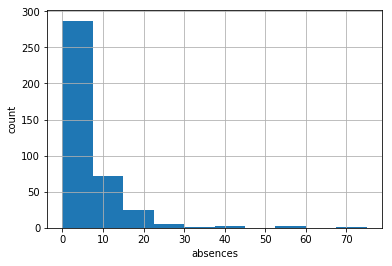

In [18]:
# histogram、データの指定
plt.hist(student_data_math.absences)

# それぞれのラベル
plt.ylabel("count")
plt.xlabel("absences")

# グリッドをつける
plt.grid(True)

0から10までの数字付近が多くなっており、また70以上など(の数字)もあり、テールな分布になっています。テールとは、分布の裾が緩やかに減少しているような分布です。なお、上のような分布を「右に歪みのある分布」といい、見た目とは異なり、よく間違えられるので表現に注意しましょう。

このヒストグラムは、データの全体像を見る上では欠かせないものですが、どのような時にデータが偏っているといえるのかなど、客観性が少し乏しくなります。そのため、次の要約統計量（中央値、平均、標準偏差など）について計算することで、データの傾向を数値化し、より客観的にデータを表現することができます。

In [19]:
# 平均値
print("平均値：", student_data_math.absences.mean())
# 中央値：中央値でデータを分けると中央値の前後でデータ数が同じになる（データの真ん中の値）、外れ値の値に影響を受けにくい
print("中央値：", student_data_math.absences.median())
# 最頻値：最も頻度が多い値
print("最頻値：", student_data_math.absences.mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64


なお、平均値の計算は以下となります（ここで$x_i$を第$i$番目のデータ（値）とします）。

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

次に、このデータが散らばっているのか、それともまとまっている（平均付近に固まっている）のかを調べるのが分散になり、式は以下です。

\begin{eqnarray}
\sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}

該当の変数を指定した後に、var()で計算できます。

In [20]:
# 分散
student_data_math.absences.var()

64.050

標準偏差は分散の平方根となります。

In [21]:
# 標準偏差 σ
student_data_math.absences.std()

8.003

np.sqrtで平方根の計算ができますので、以下の方法で出しても同じなります。

In [22]:
np.sqrt(student_data_math.absences.var())

8.003

これまで、1つ1つ統計量を見てきましたが、該当のデータの後（pandasで読み込んだデータ）にdescribe()を入力して実行することで、一気にそれらの数値を確認することができます。それぞれ順にデータ数、平均値、標準偏差、最小値、25、50、75パーセントタイル値、そして最大値になります。なお「パーセンタイル値」とは、全体を100として小さい方から数えて何番になるのかを示す数値です。例えば、30パーセンタイルは100個のデータのうち小さいほうから数えて30番目ということになります。50パーセンタイルだと50番目で真ん中の値となり、中央値になります。

In [23]:
# 要約統計量
student_data_math.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

データのタイプとしては、Seriesになるので、それぞれの要素を抽出することができます。例えば、**四分位範囲**という75%タイルと25%タイルの差を計算したい場合は、上から5番目と7番目の要素になるので、それらを使います。なお、25%タイルと75%タイルはそれぞれ第1四分位点、第3四分位点とも呼びます。

In [24]:
type(student_data_math.absences.describe())

pandas.core.series.Series

In [25]:
# 四分位範囲(75%タイル ー 25%タイル)
student_data_math.absences.describe()[6] - student_data_math.absences.describe()[4]

8.000

さらに、列名を指定しない場合は、量的データに関しては、describe()を使って一気に算出することができます。

In [26]:
# 要約統計量まとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


さて、これまで最大値、最小値、中央値、四分位範囲等を算出してきました。ただ、数字を見ているだけでは比較等がなかなか難しいので、それらをグラフ化してくれるのが、次の箱ひげ図です。1期目の成績G1と、欠席数の箱ひげ図をそれぞれ書いていますが、特徴としてかなり異なるのがわかります。箱の上底が第3四分位点、下底が第1四分位点、真ん中の線が中央値です。ヒゲの上端が最大値、下端が最小値です。これで扱うデータの範囲等がわかります。

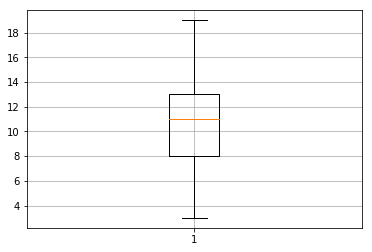

In [27]:
# 箱ひげ図：G1
plt.boxplot(student_data_math.G1)
plt.grid(True)

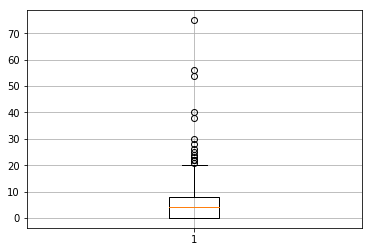

In [28]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math.absences)
plt.grid(True)

なお、データに外れ値がある場合、それが省かれて、箱ひげ図が表示されるので注意しましょう。先ほどの欠席数absencesの最大値が75なのに、グラフ上には出てきていないので、気づいている方もいるかもしません。外れ値はデフォルトで指定されており、それを取り除いた場合のグラフが表示されます。

>[参考URL]

>https://ja.wikipedia.org/wiki/箱ひげ図

他の変数でも箱ひげ図が描けるので、やってみましょう。

>**[やってみよう]**

>他の変数についても、箱ひげ図を表示させてみましょう。どんな図になっているでしょうか。そこから何かわかることがないか考察してみましょう。

なお、複数の箱ひげ図を同時に表示することも可能です。

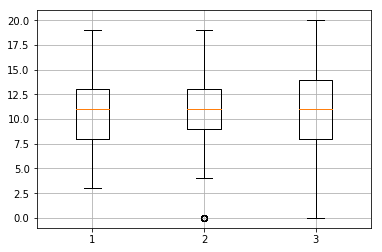

In [29]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math.G1,student_data_math.G2,student_data_math.G3])
plt.grid(True)

In [34]:
data=[student_data_math[c] for c in student_data_math.columns if str(student_data_math[c].dtype) != 'object']

In [35]:
data

[0      18
 1      17
 2      15
 3      15
 4      16
 5      16
 6      16
 7      17
 8      15
 9      15
 10     15
 11     15
 12     15
 13     15
 14     15
 15     16
 16     16
 17     16
 18     17
 19     16
 20     15
 21     15
 22     16
 23     16
 24     15
 25     16
 26     15
 27     15
 28     16
 29     16
        ..
 365    18
 366    18
 367    17
 368    18
 369    18
 370    19
 371    18
 372    17
 373    17
 374    18
 375    18
 376    20
 377    18
 378    18
 379    17
 380    18
 381    18
 382    17
 383    19
 384    18
 385    18
 386    18
 387    19
 388    18
 389    18
 390    20
 391    17
 392    21
 393    18
 394    19
 Name: age, Length: 395, dtype: int64, 0      4
 1      1
 2      1
 3      4
 4      3
 5      4
 6      2
 7      4
 8      3
 9      3
 10     4
 11     2
 12     4
 13     4
 14     2
 15     4
 16     4
 17     3
 18     3
 19     4
 20     4
 21     4
 22     4
 23     2
 24     2
 25     2
 26     2
 27     4
 28     3
 

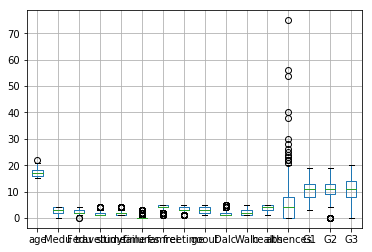

In [37]:
student_data_math.boxplot()

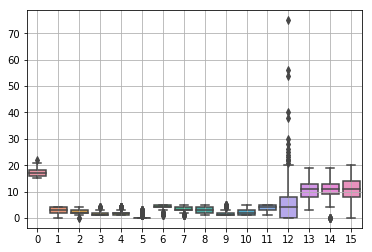

In [33]:
sns.boxplot(data=[student_data_math[c] for c in student_data_math.columns if str(student_data_math[c].dtype) != 'object']) 
plt.grid(True)

TypeError: must be str, not int

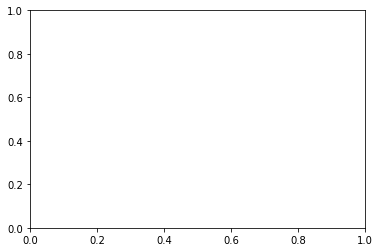

In [31]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math])
plt.grid(True)

次に、**変動係数**です。先ほど、分散や標準偏差について見てきましたが、異なる種類のデータですと、これらの単純比較はできません。データの大きさがそもそも異なると、大きな値をとるものの方が偏差も大きくなる傾向にあるからです。そこで、以下の変動係数を使うと、スケールに依存せず、比較が可能となります。

\begin{eqnarray}
CV = \frac{\sigma}{\overline{x}}\
\end{eqnarray}

In [30]:
# 変動係数：欠席数
student_data_math.absences.std()/student_data_math.absences.mean()

1.402

なお、describe()に変動係数は出力されませんが、以下のように一気に算出することも可能です。落第数（failures）と欠席数（absences）のデータの散らばり具合が大きいことがわかります。

In [32]:
# それぞれの変動係数をまとめて計算
student_data_math.std() / student_data_math.mean() 

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

さて、これまでは基本的に1変数のみに着目をして、グラフや要約統計量を算出してきました。次は、変数間の関係性を見ていくために、散布図と相関係数について学びましょう。次の散布図は1期目の成績G1と最終成績G3の図です。

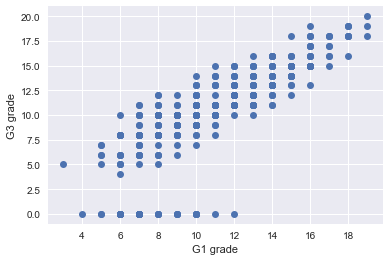

In [33]:
# 散布図
plt.plot(student_data_math.G1,student_data_math.G3, 'o')

# ラベル
plt.ylabel("G3 grade")
plt.xlabel("G1 grade")
plt.grid(True)

初めから成績がいい人ほど後の成績もいいというのは当たり前の結果ですが、傾向としてはっきりと表れているのがグラフからわかります。

補足として、このグラフをよく見てみると、最終成績(G3,Y軸）が0である人がいるのがわかります。一期の成績で0である人はいなかったので、これが異常値なのか、正しい値なのかはデータを見ているだけでは判断できませんが、データとして成績のスコアが0から20とあるので、正しい値だと判断し、このままで扱いましょう。ビジネスの現場では、なぜこのような値になっているか原因を突き止めるため、このデータに詳しい人、システム関係の人たちとヒアリングしながら理解していきます。もし、欠損値等であった場合には、対処方法は色々とありますが、後の章で学ぶことにしましょう。

次に、その2変数の関係性について、数値化してみることを考えます。まずは、**共分散**という2つの変数の関係性を見るための式が以下になります。

\begin{eqnarray}
S_{xy} = \frac{1}{n}\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})
\end{eqnarray}

共分散は、2組の対応するデータ間での平均からの偏差の積に関する平均値です。2変数以上の分散を考えるときに使われます。Numpyにcovという共分散の行列（共分散行列）を算出する機能があり、以下になります。

In [36]:
# 共分散行列
np.cov(student_data_math.G1, student_data_math.G3)

array([[ 11.017,  12.188],
       [ 12.188,  20.99 ]])

算出されている数値について、共分散行列の(1,2)と(2,1)の要素は同じく12.188となり、これはG1とG3の共分散が算出されています。一方、共分散行列の(1,1)と(2,2)の要素（11.017と20.99）を見てみると、それぞれG1の分散、G3の分散を算出しています。以下の式で算出して、同じ結果であることが確認できます。

In [37]:
# 分散
print("G1の分散:",student_data_math.G1.var())
print("G3の分散:",student_data_math.G3.var())

G1の分散: 11.017053267364899
G3の分散: 20.989616397866737


共分散はその定義式から、各変数のスケールや単位に依存してしまいます。そのスケールの影響を受けずに、2つの変数の関係を数値化するのが相関係数です。共分散をそれぞれの変数（ここではxとy）の標準偏差で割ってあげた数式が相関係数となり、以下のようになります。

\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}}
\end{eqnarray}

この相関係数は、-1から1までの値を取り、1に近ければ近いほど**正の相関**があるといい、-1に近ければ近いほど**負の相関**があるといいます。0の場合は、**無相関**であるといいます。

Pythonの実装は、scipyのピアソン関数を使って、2変数の相関係数を算出しています。単に相関関数という場合にはピアソン関数を指します。

In [34]:
sp.stats.pearsonr(student_data_math.G1,student_data_math.G3)

(0.801, 0.000)

0.8と相関関係がある高い数字が出ました。この数字については、厳密に高い低いというのはなく、またこれが高いからといって**因果関係**があるとは言えないので注意しましょう。（なお、この講座では詳しく扱いませんが、因果関係を把握したい場合には、**実験計画法**と言われるアプローチ等を使っていきます。具体的には、あるマーケティング施策で、ある広告を見て効果があったのかなかったのか、因果関係を知りたい場合に、広告を見せる処置群と何も広告を見せないコントロール群に分けて、その比率等を計算していきます。）

次の計算は、相関行列を算出しています。それぞれの変数について、すべての組み合わせで相関係数を算出しています。先ほどのG1とG3の相関係数は0.801となり、また自分自身の相関係数は1になるのが自明ですので、以下のようになります。

In [35]:
# 相関行列
np.corrcoef([student_data_math.G1,student_data_math.G3])

array([[ 1.   ,  0.801],
       [ 0.801,  1.   ]])

最後に、各変数のヒストグラムを全て表示したり、散布図を描く方法を紹介します。seabornのsns.pairplotを使います。色々な変数の関係性を一度に確認できるので、とても便利です。ただし、変数が多いと、計算時間に時間がかかり、若干見にくくなりますが、その時はPandasで学んだ変数を絞り込むなどして、計算を実行してください。

サンプルとして、先ほどのデータにて、アルコールの摂取量と成績のスコアに関係があるのか、見てみましょう。Dalcは平日のアルコール摂取量、Walcは週末のアルコール摂取量で、それらと1期目の成績（G1）、最終成績(G3)の関係を見ています。アルコールを飲むからといって、成績が悪いと言えるのでしょうか。それとも関係ないのでしょうか。

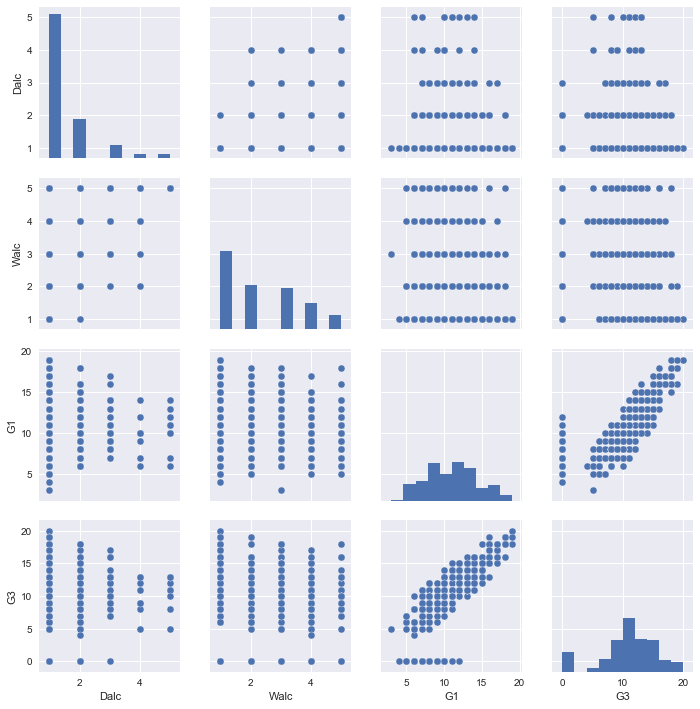

In [38]:
sns.pairplot(student_data_math[["Dalc","Walc","G1","G3"]])
plt.grid(True)

In [39]:
# 例：週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby("Walc")["G1"].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

グラフから、平日アルコールを頻繁に飲んでいる人（4や5の人）はG3で好成績を取っている人はいないようですが、極端に悪い成績を取っている人もいないようです。また、週末にアルコールを飲まない人の方が1期目の成績は少し良さそうに見えますが、こう結論付けて良いのでしょうか。これらのグラフや数値だけでは、なかなか判断が難しいですが、次の統計の章や機械学習の章でもアプローチしてみます。

以上で、記述統計に関する基礎的事項は終了になります。とても基本的な箇所ですが、どんなデータ分析をするにしても、データの全体像をつかむためには、必要な作業となります。

この講座では、機械学習のライブライリー等を使って、簡単に機械学習の計算ができることを紹介していきます。一方で、今までやってきた基礎的な統計量を見ていくことも大事であることは強調しておきます。簡単な散布図を書くだけで重要な傾向がわかったりすることもあります。また、ここまでの内容はおそらく数学的なバックグラウンドがない人でもついていきやすく、説明がしやすいです。

もちろん、これだけで終わるならば、機械学習は必要なくなりますが、機械学習を適応する前に、データと対話をして、不明事項や異常値等の確認をするなど、関係者と密に連携をとっておけば、よりよいデータ分析ができます。

>**[ポイント]**

>データ分析をするときにはまず基本統計量やヒストグラム、散布図等を見て、データの全体像を掴もう。

#### <練習問題 1>

studet-por.csvを読み込んで、要約統計量を表示してください。

#### <練習問題 2>

以下の変数をキーとして、先ほどの数学のデータとポルトガル語のデータをマージしてください。マージするときは、両方ともに含まれているデータを対象としてください（内部結合と言います）。そして、要約統計量など計算してください。なお、以下以外の変数名は、重複がありますので、suffixes=('_math', '_por')のパラメータを追加して、どちらからのデータかわかるようにしてください。

["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

#### <練習問題 3>

上記のマージしたデータについて、変数を幾つかピックアップして、散布図とヒストグラムを作成してみましょう。どういった傾向がありますか。また、数学データのみの結果と違いはありますか。考察してみましょう。

***

### 3.1.2 単回帰分析
キーワード：sklearn、目的変数、説明変数、単回帰分析、最小二乗法、決定係数

次は、単回帰分析について学びましょう。なお、厳密には次の章で学ぶ統計や推定、検定の知識等が必要で、ほとんどの統計の教科書はその後で回帰分析が解説されていますが、実装は難しくなく、最低限は理解できると思いますので、後で振り返って復習してください。

これから考える問題は回帰問題といい、数値を予測する問題です。先ほど、学生のデータについて、一期目の数学の成績と最終期の数学の成績をグラフ化（散布図）してみました。この散布図からG1とG3には関係がありそうだというのはわかります。

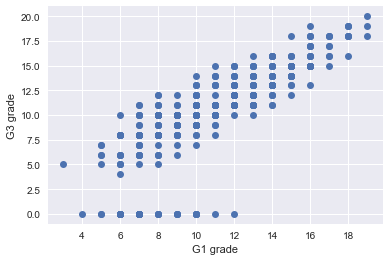

In [40]:
# 散布図
plt.plot(student_data_math.G1,student_data_math.G3, 'o')
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")
plt.grid(True)

回帰問題では、与えられたデータから関係式を仮定して、データに最も当てはまる係数を求めていきます。具体的には、あらかじめG1という成績が分かった上で、G3の成績を予測することになります。つまり、目的となる変数G3（**目的変数**といいます）があり、それを説明する変数G1（**説明変数**といいます）を使って予測します。これは後ほど機械学習の章で学ぶ「教師あり学習」になり、学習時のデータに正解を1つ1つ与えて、その関係性を計算する方法です。

単回帰分析は、このアウトプットとインプットの関係が1変数のみで成り立つ式を仮定して解いていきます（なお、インプットデータが2変数以上ある場合は、重回帰分析と言い、後の章で学びます）。

ここでは、線形単回帰というアウトプットとインプットが線形の関係に成り立つ（y = ax +b）という仮定のもと、式を立てて計算してみましょう。線形単回帰分析は、以下のsklearnモジュールのlinear_modelを使います。sklearnは機械学習のためのモジュールで、後の機械学習の章でさらに色々な計算ができることを学んでいきます。

In [41]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
clf = linear_model.LinearRegression()

以下では、説明変数（Xとします）と目的変数（Yとします）データをセットして、線形回帰のfitを使って、予測モデルを計算します。

この時、**最小二乗法**という手法で係数aと切片bを計算しています。この方法は、実際の目的変数のデータと予測したデータの差の二乗和をとり、それが最小になる時の係数と切片を求めています。式で表現すると、yを実測値、f(x)=ax+bを予測値として、以下の式を最小にするように計算しています(計算方法としては、この式を微分していくのですが、割愛します)。

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

In [40]:
student_data_math['G1'].as_matrix()

array([ 5,  5,  7, 15,  6, 15, 12,  6, 16, 14, 10, 10, 14, 10, 14, 14, 13,
        8,  6,  8, 13, 12, 15, 13, 10,  6, 12, 15, 11, 10,  9, 17, 17,  8,
       12,  8, 15, 15, 12, 14,  7, 12, 19,  8, 10,  8, 11, 19, 15,  7, 12,
       11, 11,  8, 10,  8, 14, 14,  9, 15, 10, 10,  8, 10, 10, 16, 13,  7,
        8, 16, 13, 10,  8, 12, 11,  9, 11, 11,  8,  5, 10, 11,  7, 15,  9,
        7,  8, 13, 11,  8,  7, 16,  7, 11, 11,  7, 11,  8, 11,  7,  7, 16,
       10,  7, 16, 10,  7, 16, 10, 14, 18,  7, 10, 18,  9, 15, 11, 13,  9,
       14, 16, 16, 13, 14,  8, 13,  7,  7,  7, 18, 12,  8, 10, 12,  9, 11,
       10,  4, 14, 16,  7,  9,  9, 14,  5,  8,  6, 10,  7,  8,  6, 12, 10,
        5, 11, 11, 16,  9, 17, 10,  7,  5,  7, 10,  5, 12, 10, 14,  6, 14,
        6, 13, 13,  8, 10, 10, 13,  6, 10, 10,  9, 12, 16,  9, 12, 12, 11,
       15,  8,  8, 11,  8,  7,  8, 13, 14, 17,  9, 18,  9, 16,  8,  9,  7,
       10, 10,  7, 11,  9,  7,  8, 12, 12,  6,  8, 14,  6,  6,  7,  9,  6,
        6, 16, 12, 13,  9

In [39]:
student_data_math.loc[:, ['G1']].as_matrix()

array([[ 5],
       [ 5],
       [ 7],
       [15],
       [ 6],
       [15],
       [12],
       [ 6],
       [16],
       [14],
       [10],
       [10],
       [14],
       [10],
       [14],
       [14],
       [13],
       [ 8],
       [ 6],
       [ 8],
       [13],
       [12],
       [15],
       [13],
       [10],
       [ 6],
       [12],
       [15],
       [11],
       [10],
       [ 9],
       [17],
       [17],
       [ 8],
       [12],
       [ 8],
       [15],
       [15],
       [12],
       [14],
       [ 7],
       [12],
       [19],
       [ 8],
       [10],
       [ 8],
       [11],
       [19],
       [15],
       [ 7],
       [12],
       [11],
       [11],
       [ 8],
       [10],
       [ 8],
       [14],
       [14],
       [ 9],
       [15],
       [10],
       [10],
       [ 8],
       [10],
       [10],
       [16],
       [13],
       [ 7],
       [ 8],
       [16],
       [13],
       [10],
       [ 8],
       [12],
       [11],
       [ 9],
       [11],

In [42]:
# 説明変数に "一期目の数学の成績" を利用
# ilocはデータフレームから、行と列を指定して取り出す。loc[:, ['G1']]は、G1列のすべての列を取り出すことをしている
# marixの型に直しているので、注意
X = student_data_math.loc[:, ['G1']].as_matrix()

# 目的変数に "最終の数学の成績" を利用
Y = student_data_math['G3'].as_matrix()
 
# 予測モデルを計算、ここでa,bを算出
clf.fit(X, Y)
 
# 回帰係数
print("回帰係数:", clf.coef_)
 
# 切片 
print("切片:", clf.intercept_)

回帰係数: [ 1.106]
切片: -1.6528038288


In [43]:
help(clf.fit)

Help on method fit in module sklearn.linear_model.base:

fit(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : numpy array or sparse matrix of shape [n_samples,n_features]
        Training data
    
    y : numpy array of shape [n_samples, n_targets]
        Target values
    
    sample_weight : numpy array of shape [n_samples]
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



上記の回帰係数が線形の回帰式y=ax+bのaで、切片がbとなります。先ほどの散布図と一緒に、予測した線形回帰式を書いてみましょう。Yを予測したい最終の数学の成績G3は、predict(説明変数)で計算できます。

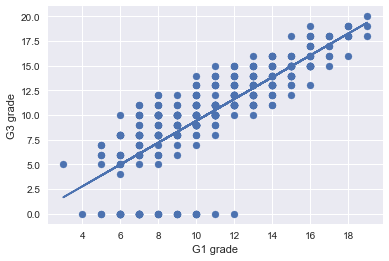

In [44]:
# 先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")

# その上に線形回帰直線を引く
plt.plot(X, clf.predict(X))
plt.grid(True)

グラフから予測式は実測値をうまく予測しているようにも見えますが、これが客観的にどうなのかというのは判断がつきません。そこで、それを数値化したものが、**決定係数** R$^2$で、R$^2 =1-\frac{\sum_{i=1}^{n} (y_i -f(x_i) )^2}{\sum_{i=1}^{n} (y_i -\bar{y})^2}$で定義されます。これは0から1までの値を取り、1に近ければ近いほど良いモデルになります。実装では、scoreを使って以下のように算出します。

In [45]:
# 決定係数、寄与率とも呼ばれる
print("決定係数:", clf.score(X, Y))

決定係数: 0.642350846052


なお、この決定係数の数値がどこまで高ければ良いのかという問題はあります。教科書的なデータや問題では0.9以上の場合が多いですが、実務ではなかなかそこまで出せることはなく、それをどう判断するかはケースバイケースです。ちなみに、上の0.64は高くはないですが、現場レベルで見ると、使えないレベルではありません。

以上で、単回帰分析と本章の説明は終わりになります。お疲れ様でした。残りは、練習問題と総合演習問題になりますので、ぜひチャレンジしてください。

#### <練習問題 1>

student-por.csvのデータを使って、G3を目的変数、G1を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。

#### <練習問題 2>

上のデータの実際の散布図と、回帰直線を合わせてグラフ化してください。

#### <練習問題 3>

student-por.csvのデータを使って、G3を目的変数、absences(欠席数)を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。この結果を見て、考察してみましょう。

***

## 3.2 総合問題

### 3.2.1 統計の基礎と可視化

以下のサイトにあるデータ（ワインの品質）を読み込み、以下の問いに答えてください。

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

（1）基本統計量（平均、最大値、最小値、標準偏差など）を算出してください。

（2）それぞれの変数の分布と、それぞれの変数の関係性（2変数間のみ）がわかるように、グラフ化してみましょう。何かわかる傾向はありますか。

### 3.2.2 ローレンツ曲線とジニ係数

3.1の記述統計で使用したstudent_data_mathのデータを使って、以下の問いに答えてください。

（1）一期目の数学データについて、男女別に昇順に並び替えをしてください。そして、横軸に人数の累積比率、縦軸に一期目の値の累積比率をとってください。この曲線をローレンツ曲線といいます。このローレンツ曲線を男女別に一期目の数学成績でグラフ化してください。

（2）不平等の程度を数値で表したものをジニ係数といいます。この値は、ローレンツ曲線と45度線で囲まれた部分の面積の2倍で定義されて、0から1の値を取ります。値が大きければ大きいほど、不平等の度合いが大きくなります。なお以下のようにジニ係数は定義できます。$\overline{x}$は平均値です。

\begin{eqnarray}
GI=\sum_{i}\sum_{j}\left| \frac{x_i-x_j}{2n^2 \overline{x}}\right|
\end{eqnarray}

これを利用して、男女の一期目の成績について、ジニ係数をそれぞれ求めてください。

In [1]:
ls

AnswerChapter1-checkpoint.ipynb  Chapter4-checkpoint.ipynb
AnswerChapter3-checkpoint.ipynb  Untitled-checkpoint.ipynb
Chapter1-checkpoint.ipynb        exam_1-checkpoint.ipynb
Chapter2-checkpoint.ipynb        exam_3-checkpoint.ipynb
Chapter3-checkpoint.ipynb
